#### Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
- Draw plots to demonstrate the analysis for the following questions for better visualizations. 2. Write code comments wherever required for code understanding
#### Insights to be drawn -
- Get all Pokemons whose spawn rate is less than 5%
- Get all Pokemons that have less than 4 weaknesses
- Get all Pokemons that have no multipliers at all
- Get all Pokemons that do not have more than 2 evolutions
- Get all Pokemons whose spawn time is less than 300 seconds.
-- Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
- Get all Pokemon who have more than two types of capabilities


In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [159]:
df = pd.read_excel('pokemon_data.xlsx')
df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weakness,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",[]
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",[],"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,[1.65],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",[]
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,[1.79],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              151 non-null    int64  
 1   num             151 non-null    int64  
 2   name            151 non-null    object 
 3   img             151 non-null    object 
 4   type            151 non-null    object 
 5   height          151 non-null    object 
 6   weight          151 non-null    object 
 7   candy           151 non-null    object 
 8   candy_count     70 non-null     float64
 9   egg             151 non-null    object 
 10  spawn_chance    151 non-null    float64
 11  avg_spawns      151 non-null    float64
 12  spawn_time      145 non-null    object 
 13  multipliers     70 non-null     object 
 14  weakness        151 non-null    object 
 15  next_evolution  151 non-null    object 
 16  prev_evolution  151 non-null    object 
dtypes: float64(3), int64(2), object(12)

<AxesSubplot:xlabel='spawn_chance', ylabel='Count'>

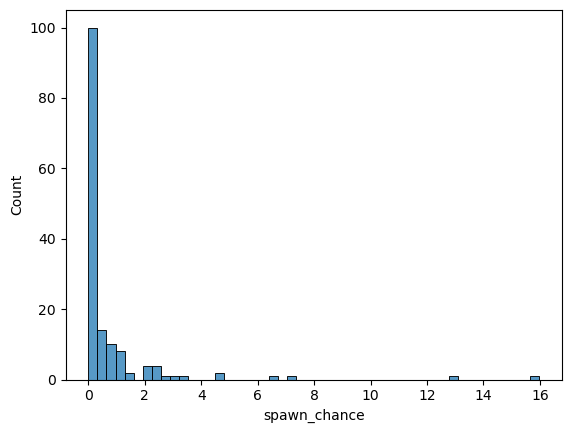

In [161]:
sns.histplot(data=df, x='spawn_chance',bins=50)

In [162]:
# Get all Pokemons whose spawn rate is less than 5%
less_spawn_rate = df[df['spawn_chance']<0.05]
print(f"{len(less_spawn_rate)} out of {len(df)} Pokemons whose spawn rate is less than 5%")

65 out of 151 Pokemons whose spawn rate is less than 5%


In [163]:
import ast
df['type'] = df['type'].apply(ast.literal_eval)
df['weakness'] = df['weakness'].apply(ast.literal_eval)
df['next_evolution'] = df['next_evolution'].apply(ast.literal_eval)
df['prev_evolution'] = df['prev_evolution'].apply(ast.literal_eval)

<AxesSubplot:xlabel='weakness', ylabel='count'>

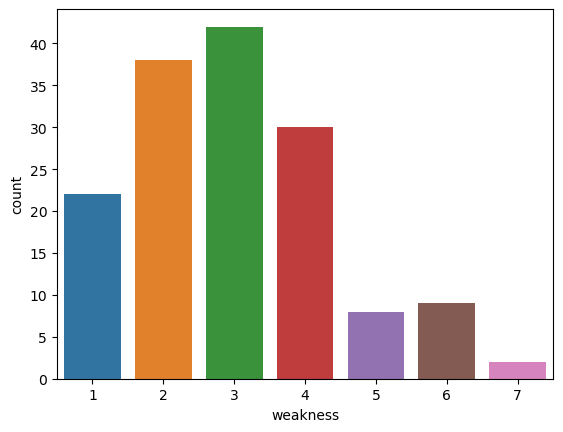

In [164]:
sns.countplot(data=df, x=df['weakness'].apply(len))

In [165]:
# Get all Pokemons that have less than 4 weaknesses
less_weakness = df[df['weakness'].apply(len)<4]
print(f"{len(less_weakness)} out of {len(df)} Pokemons that have less than 4 weaknesses")

102 out of 151 Pokemons that have less than 4 weaknesses


([<matplotlib.patches.Wedge at 0x7fadd811cd60>,
 [Text(-0.1255973168123432, 1.0928061648844867, 'Null'),
  Text(0.12559741912824002, -1.0928061531252125, 'Non-Null')],
 [Text(-0.0685076273521872, 0.5960760899369927, '53.6%'),
  Text(0.06850768316085817, -0.5960760835228431, '46.4%')])

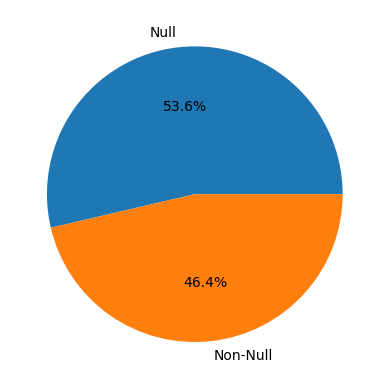

In [166]:
# Count the occurrences of null and non-null values
null_count = df['multipliers'].isnull().sum()
non_null_count = df['multipliers'].notnull().sum()

# Plot the pie chart
plt.pie([null_count, non_null_count], labels=['Null', 'Non-Null'], autopct='%1.1f%%')

In [167]:
# Get all Pokemons that have no multipliers at all
null_multipliers = df[df['multipliers'].isna()]
print(f"{len(null_multipliers)} out of {len(df)} Pokemons that have no multipliers at all")

81 out of 151 Pokemons that have no multipliers at all


<AxesSubplot:xlabel='next_evolution', ylabel='count'>

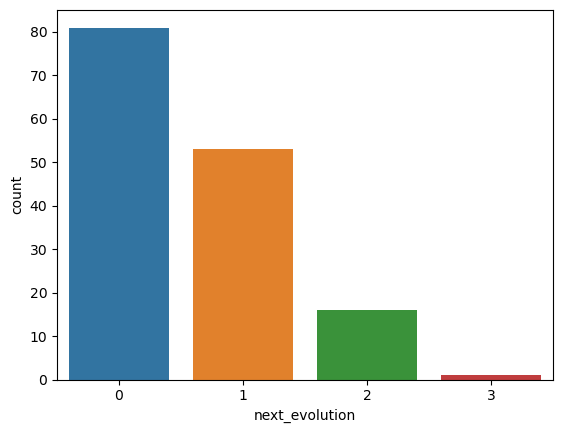

In [168]:
sns.countplot(data=df, x=df['next_evolution'].apply(len))

In [169]:
# Get all Pokemons that do not have more than 2 evolutions
more_next_evolution = df[df['next_evolution'].apply(len)>2]
print(f"{len(more_next_evolution)} out of {len(df)} Pokemons that do not have more than 2 evolutions")

1 out of 151 Pokemons that do not have more than 2 evolutions


In [170]:
df[['Minutes', 'Second']] = df['spawn_time'].str.split(':', expand=True)
# Converting minites and seconds to seconds
df['Seconds'] = pd.to_numeric(df['Minutes']) * 60 + pd.to_numeric(df['Second'])

<AxesSubplot:xlabel='Seconds', ylabel='Count'>

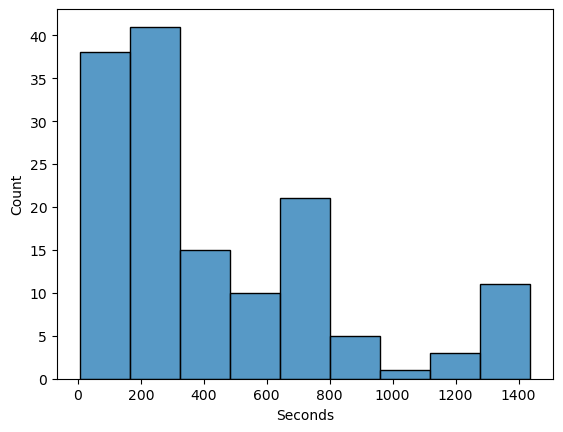

In [171]:
sns.histplot(data=df, x=df['Seconds'])

In [172]:
# Get all Pokemons whose spawn time is less than 300 seconds.
less_spawn_time = df[df['Seconds']<300]
print(f"{len(less_spawn_time)} out of {len(df)} Pokemons whose spawn time is less than 300 seconds.")

75 out of 151 Pokemons whose spawn time is less than 300 seconds.


<AxesSubplot:xlabel='type', ylabel='count'>

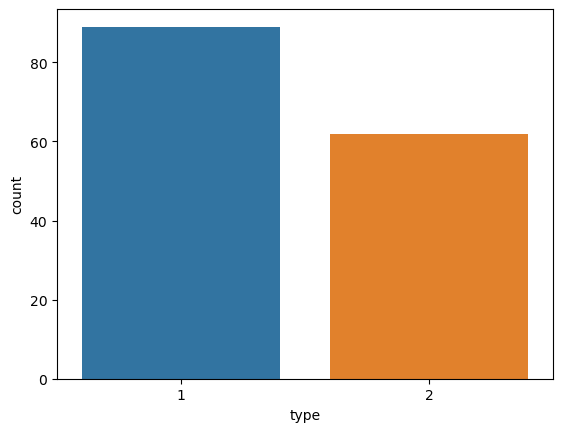

In [173]:
sns.countplot(data=df, x=df['type'].apply(len))

In [174]:
# Get all Pokemon who have more than two types of capabilities
more_type = df[df['type'].apply(len)>2]
print(f"{len(more_type)} out of {len(df)} Pokemon who have more than two types of capabilities")

0 out of 151 Pokemon who have more than two types of capabilities
